In [ ]:
%reset -f

%load_ext autoreload
%autoreload 2

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.size'] = 14

plt.rcParams['lines.markersize'] = 8

### Flags
save_figs = True

In [124]:
import matplotlib as mpl
mpl.style.use('seaborn-paper')
#mpl.style.available


In [125]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from tqdm import tqdm

In [126]:
import sys
import os
import pickle

OUTFIGURES   = "../report/figures"
SAVEFIGS    = True 

In [127]:
import sys
sys.path.insert(0, "../../")
from mlgtsrc.envs.frozen import frozen_lake, helpers
from mlgtsrc.envs.frozen.constants import FL4x4, FL8x8, TERM_STATE_MAP, GOAL_STATE_MAP
from mlgtsrc import a4analytics

## Plot the Frozen Lake Environment

In [128]:
# Change this to work on a different environment
ENV_NAME = FL4x4

env_kwargs = {
        'map_name': ENV_NAME,
        'slip_rate': .2,
        'rewards': (-1, -10, 10)
    }
env_frozen_4x4 = frozen_lake.FrozenLakeEnv(**env_kwargs)

In [129]:
ENV_NAME = FL8x8

env_kwargs = {
        'map_name': ENV_NAME,
        'slip_rate': .2,
        'rewards': (-1, -10, 10)
    }
env_frozen_8x8 = frozen_lake.FrozenLakeEnv(**env_kwargs)

In [36]:
env_frozen_8x8.step(1)

(0, -1, False, {'prob': 0.1})

In [37]:
env_frozen_8x8.step(2)

(1, -1, False, {'prob': 0.8})

In [32]:
env_frozen_8x8.step(2)

(17, -1, False, {'prob': 0.8})

In [33]:
env_frozen_8x8.step(1)

(25, -1, False, {'prob': 0.8})

In [34]:
env_frozen_8x8.step(2)

(26, -1, False, {'prob': 0.8})

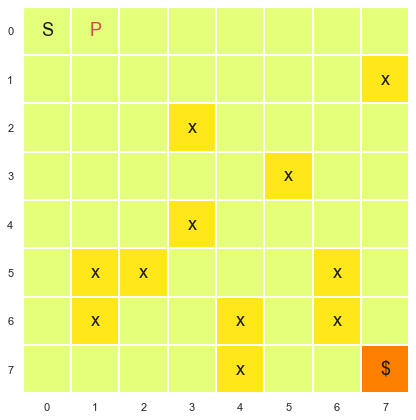

In [38]:
fig = helpers.visualize_env(env_frozen_8x8, ENV_NAME)
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_8x8.png"))

In [17]:
env_frozen_4x4.reset()

0

In [18]:
env_frozen_4x4.step(2)

env_frozen_4x4.step(2)

(2, -1, False, {'prob': 0.8})

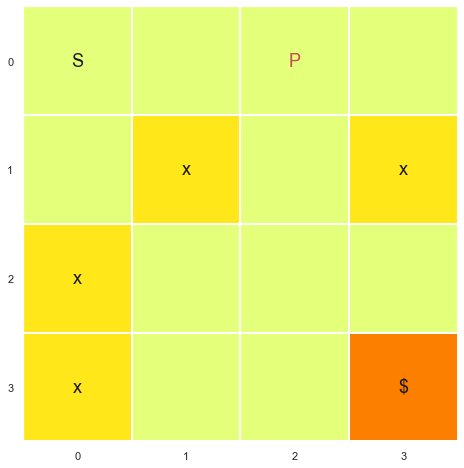

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
helpers.visualize_env(env_frozen_4x4, FL4x4, ax = ax)
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_4x4.png"))

### Value Iteration: 4x4

In [20]:
env_frozen_4x4.reset()

0

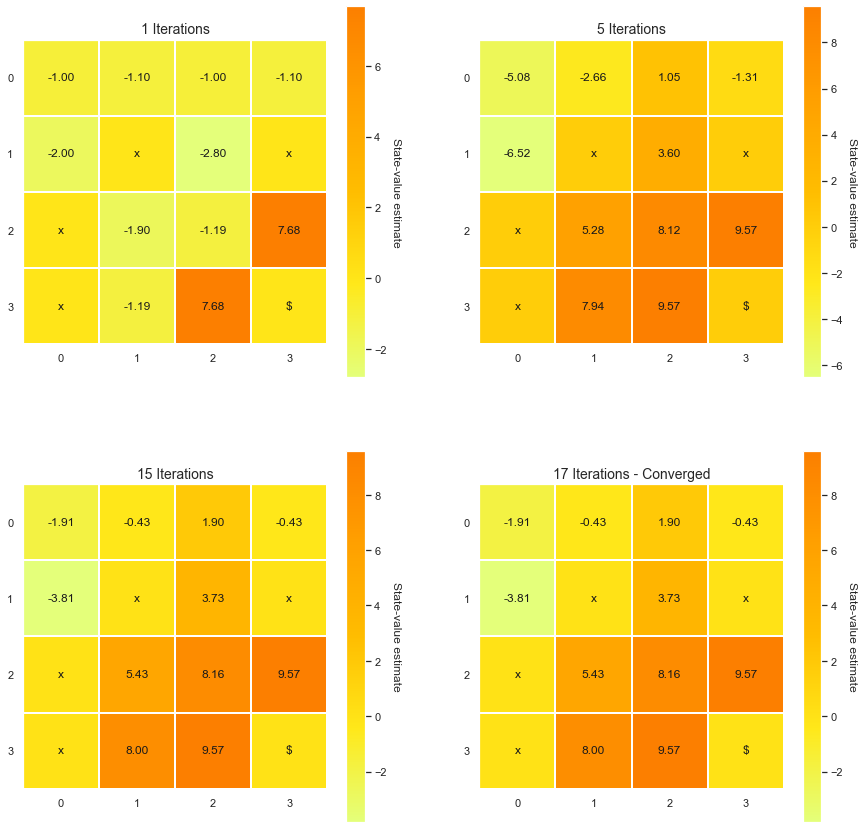

In [28]:
ENV_NAME = FL4x4
shape = [4,4]

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(2, 2, 1)

env_frozen_4x4.reset()
V, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_4x4, theta=0.0001, gamma=1.0, maxNumItersForPlot = 1)
helpers.visualize_value(V, ENV_NAME, shape = shape, ax = ax, title = '1 Iterations')


ax = fig.add_subplot(2, 2, 2)

env_frozen_4x4.reset()
V, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_4x4, theta=0.0001, gamma=1.0, maxNumItersForPlot = 5)
helpers.visualize_value(V, ENV_NAME, shape = shape, ax = ax, title = '5 Iterations')


ax = fig.add_subplot(2, 2, 3)

env_frozen_4x4.reset()
V, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_4x4, theta=0.0001, gamma=1.0, maxNumItersForPlot = 15)
helpers.visualize_value(V, ENV_NAME, shape = shape, ax = ax, title = '15 Iterations')


ax = fig.add_subplot(2, 2, 4)

env_frozen_4x4.reset()
V, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_4x4, theta=0.0001, gamma=1.0)
helpers.visualize_value(V, ENV_NAME, shape = shape, ax = ax, title = f'{n_iter} Iterations - Converged')

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_val_iter_4x4.png"))

### Value Iteration: 8x8

In [31]:
ENV_NAME = FL8x8

In [32]:
env_frozen_8x8.reset()

0

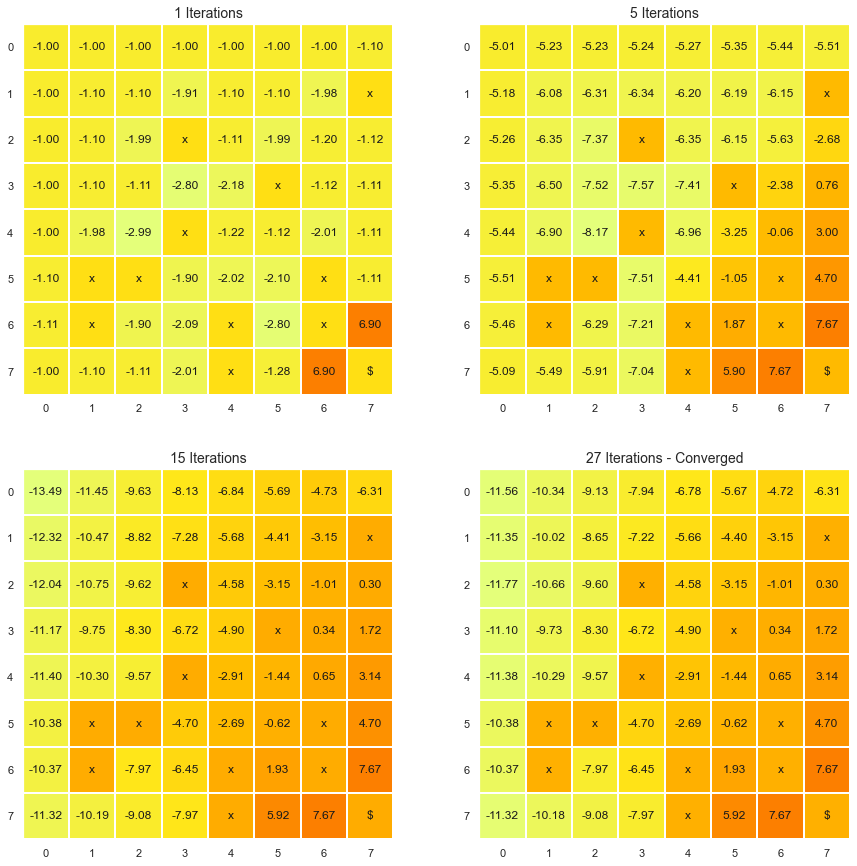

In [118]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(2, 2, 1)

env_frozen_8x8.reset()
V, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_8x8, theta=0.0001, gamma=1.0, maxNumItersForPlot = 1)
helpers.visualize_value(V, ENV_NAME, shape = [8,8], ax = ax, title = '1 Iterations', removeColorBar = True)


ax = fig.add_subplot(2, 2, 2)

env_frozen_8x8.reset()
V, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_8x8, theta=0.0001, gamma=1.0, maxNumItersForPlot = 5)
helpers.visualize_value(V, ENV_NAME, shape = [8,8], ax = ax, title = '5 Iterations', removeColorBar = True)


ax = fig.add_subplot(2, 2, 3)

env_frozen_8x8.reset()
V, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_8x8, theta=0.0001, gamma=1.0, maxNumItersForPlot = 15)
helpers.visualize_value(V, ENV_NAME, shape = [8,8], ax = ax, title = '15 Iterations', removeColorBar = True)


ax = fig.add_subplot(2, 2, 4)

env_frozen_8x8.reset()
V, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_8x8, theta=0.0001, gamma=1.0)
helpers.visualize_value(V, ENV_NAME, shape = [8,8], ax = ax, title = f'{n_iter} Iterations - Converged', removeColorBar = True)

#fig.tight_layout()

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_val_iter_8x8.png"))

### Plot the policies for each grid

In [34]:
env_frozen_8x8.reset()
V_8x8, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_8x8, theta=0.0001, gamma=1.0)

env_frozen_4x4.reset()
V_4x4, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_4x4, theta=0.0001, gamma=1.0)


In [35]:
policy_4x4 = a4analytics.getPolicyAccordingToValue(V_4x4, env_frozen_4x4, gamma= 1)
policy_8x8 = a4analytics.getPolicyAccordingToValue(V_8x8, env_frozen_8x8, gamma= 1)

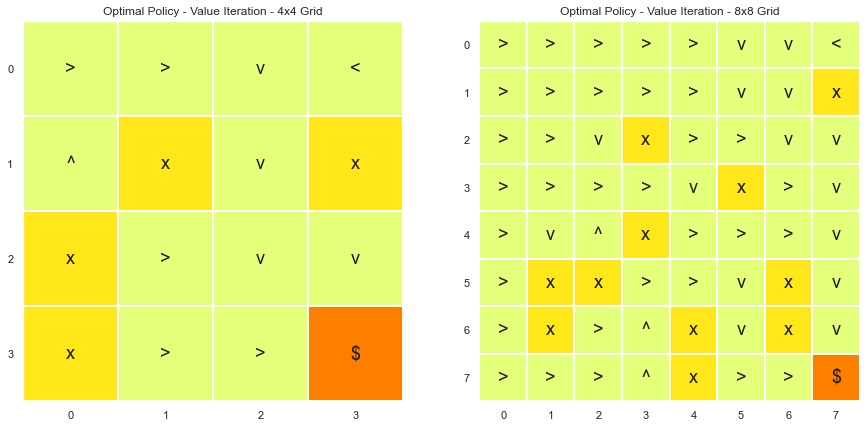

In [36]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(1, 2, 1)
helpers.visualize_policy(policy_4x4, env_name = FL4x4, shape = [4,4], title='Optimal Policy - Value Iteration - 4x4 Grid', ax = ax)

ax = fig.add_subplot(1, 2, 2)
helpers.visualize_policy(policy_8x8, env_name = FL8x8, shape = [8,8], title='Optimal Policy - Value Iteration - 8x8 Grid', ax = ax)

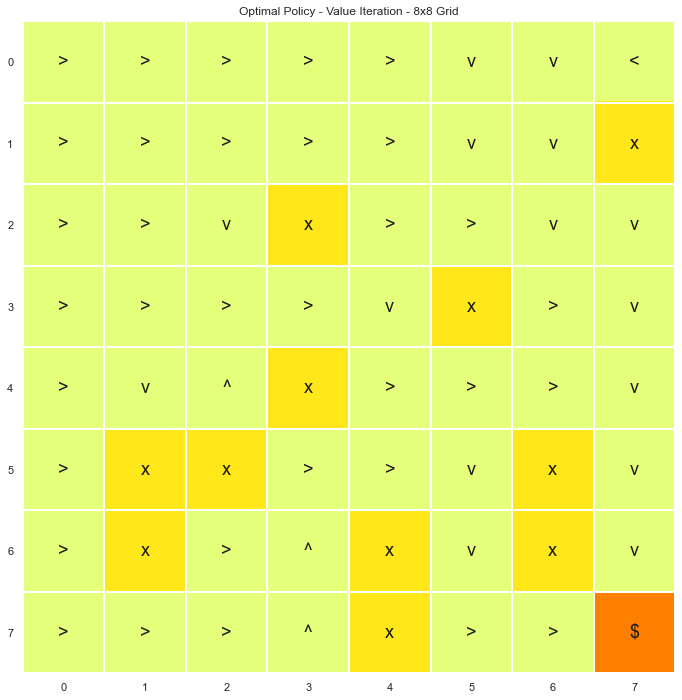

In [115]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(1, 1, 1)
helpers.visualize_policy(policy_8x8, env_name = FL8x8, shape = [8,8], title='Optimal Policy - Value Iteration - 8x8 Grid', ax = ax)
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_val_policy_8x8.png"))

### Policy Iteration

See if policy iteration coincides with Value iteration

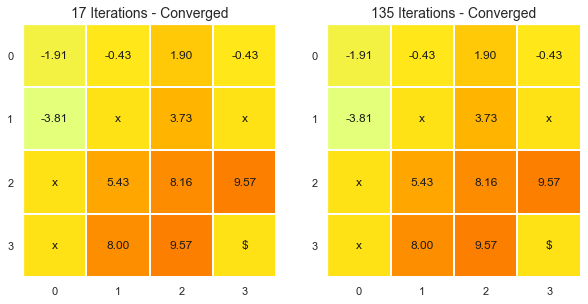

In [100]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 2, 1)
ENV_NAME = FL4x4
shape = [4, 4]
env_frozen_4x4.reset()
V_4x4, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_4x4, theta=0.0001, gamma=1.0)
helpers.visualize_value(V_4x4, ENV_NAME, shape = shape, ax = ax, title = f'{n_iter} Iterations - Converged',
                       removeColorBar = True)

ax = fig.add_subplot(1, 2, 2)
env_frozen_4x4.reset()
V_4x4, policy, n_iter, tota_run_time = a4analytics.policyIteration(env_frozen_4x4, theta=0.0001, gamma=1.0)
helpers.visualize_value(V_4x4, ENV_NAME, shape = shape, ax = ax, title = f'{n_iter} Iterations - Converged', removeColorBar = True)

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_policy_vs_val_iter_8x8.png"))


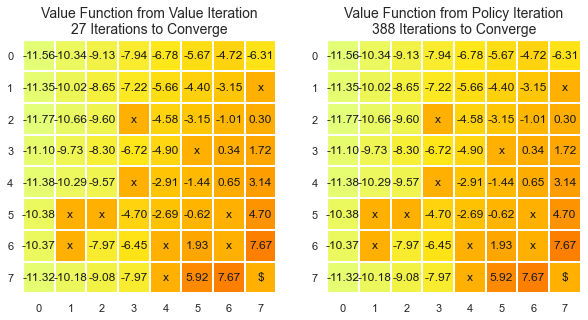

In [117]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 2, 1)
ENV_NAME = FL8x8
shape = [8, 8]
env_frozen_8x8.reset()
V_8x8, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_8x8, theta=0.0001, gamma=1.0)
helpers.visualize_value(V_8x8, ENV_NAME, shape = shape, ax = ax, title = f'Value Function from Value Iteration\n{n_iter} Iterations to Converge',
                       removeColorBar = True)

ax = fig.add_subplot(1, 2, 2)
env_frozen_8x8.reset()
V_8x8, policy, n_iter, tota_run_time = a4analytics.policyIteration(env_frozen_8x8, theta=0.0001, gamma=1.0)
helpers.visualize_value(V_8x8, ENV_NAME, shape = shape, ax = ax, title = f'Value Function from Policy Iteration\n{n_iter} Iterations to Converge', removeColorBar = True)

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_policy_vs_val_iter_8x8.png"))


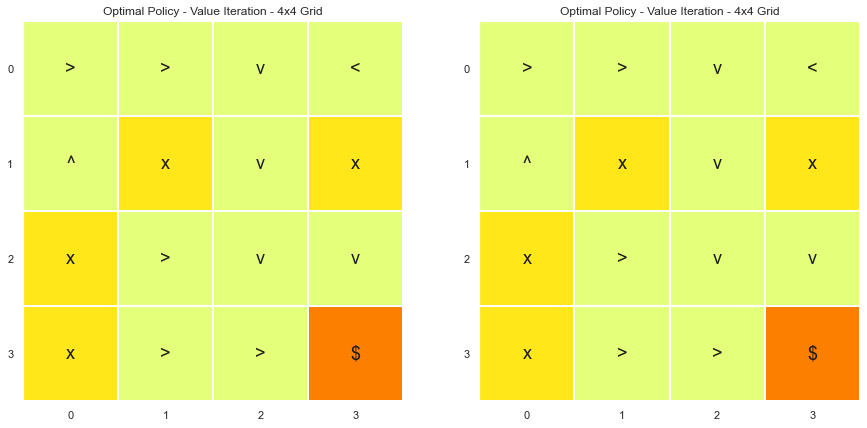

In [56]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(1, 2, 1)

env_frozen_4x4.reset()
V_4x4, n_iter, tota_run_time = a4analytics.valueIteration(env_frozen_4x4, theta=0.0001, gamma=1.0)
helpers.visualize_policy(policy_4x4, env_name = FL4x4, shape = [4,4], title='Optimal Policy - Value Iteration - 4x4 Grid', ax = ax)

ax = fig.add_subplot(1, 2, 2)
V_4x4, policy, n_iter, tota_run_time = a4analytics.policyIteration(env_frozen_4x4, theta=0.0001, gamma=1.0)
helpers.visualize_policy(policy_4x4, env_name = FL4x4, shape = [4,4], title='Optimal Policy - Value Iteration - 4x4 Grid', ax = ax)


### Do a table of convergence by problem size

In [130]:
planninResultsTable = pd.DataFrame(columns = ["Problem Size", "Method", 'Number of Iterations', "Time to converge (ms)"])

In [131]:
idx = 0
for problemSize, env in zip(['4x4', '8x8'], [env_frozen_4x4, env_frozen_8x8]):
    for method, planningFunc in zip(['Value Iteration', 'Policy Iteration'], [a4analytics.valueIteration, a4analytics.policyIteration]):
        env.reset()
        if 'policy' in method.lower():
            V, _, n_iter, tota_run_time = planningFunc(env, theta=0.0001, gamma=1.0)
        else:
            V, n_iter, tota_run_time = planningFunc(env, theta=0.0001, gamma=1.0)
        planninResultsTable.loc[idx, :] = [problemSize, method, n_iter, tota_run_time*1e3]
        idx+=1
        

In [132]:
planninResultsTable

,Problem Size,Method,Number of Iterations,Time to converge (ms)
0,4x4,Value Iteration,17,4.999161
1,4x4,Policy Iteration,145,39.995432
2,8x8,Value Iteration,27,39.014816
3,8x8,Policy Iteration,1920,1767.613649


In [133]:
from pprint import pprint as pp

In [134]:
with open(os.path.join(OUTFIGURES, "num_iters_frozen_lake_comparison.txt"), 'w') as tf:
     tf.write(planninResultsTable.to_latex())

C:\Users\User\AppData\Local\Temp\ipykernel_9732\1694465793.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(planninResultsTable.to_latex())


In [135]:
pp(planninResultsTable.to_latex())

('\\begin{tabular}{lllll}\n'
 '\\toprule\n'
 '{} & Problem Size &            Method & Number of Iterations & Time to '
 'converge (ms) \\\\\n'
 '\\midrule\n'
 '0 &          4x4 &   Value Iteration &                   17 &              '
 '4.999161 \\\\\n'
 '1 &          4x4 &  Policy Iteration &                  145 &             '
 '39.995432 \\\\\n'
 '2 &          8x8 &   Value Iteration &                   27 &             '
 '39.014816 \\\\\n'
 '3 &          8x8 &  Policy Iteration &                 1920 &           '
 '1767.613649 \\\\\n'
 '\\bottomrule\n'
 '\\end{tabular}\n')


C:\Users\User\AppData\Local\Temp\ipykernel_9732\1777726500.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pp(planninResultsTable.to_latex())


In [88]:
env_frozen_4x4.reset()

0

In [89]:
V_4x4, policy, n_iter, tota_run_time = a4analytics.policyIteration(env_frozen_4x4, theta=0.0001, gamma=1.0)

In [90]:
n_iter

139

### Interesting... Policy Iteraton does not take the same amount of iterations to converge... why?

In [143]:
numRepeatedTrials = 10

planninResultsTable = pd.DataFrame(columns = ['Value Iteration', "Policy Iteration"])

env = env_frozen_8x8
for idx in range(numRepeatedTrials):
    env.reset()
    V, _, n_iter_policy, tota_run_time = a4analytics.policyIteration(env, theta=0.0001, gamma=1.0)
    
    env.seed(1)
    env.reset()   
    
    V, n_iter_val, tota_run_time = a4analytics.valueIteration(env, theta=0.0001, gamma=1.0)
    
    planninResultsTable.loc[idx, :] = [n_iter_val, n_iter_policy]

        

In [129]:
planninResultsTable

,Value Iteration,Policy Iteration
0,27,379
1,27,88387
2,27,205
3,27,1963
4,27,759
5,27,405
6,27,621
7,27,5893
8,27,758
9,27,1182


### It was not taking the same time because I was not fixing the random seed when initializing the policy!

Now after fixing the seed, it does take the same number of iterations

In [144]:
planninResultsTable

,Value Iteration,Policy Iteration
0,27,1920
1,27,1920
2,27,1920
3,27,1920
4,27,1920
5,27,1920
6,27,1920
7,27,1920
8,27,1920
9,27,1920


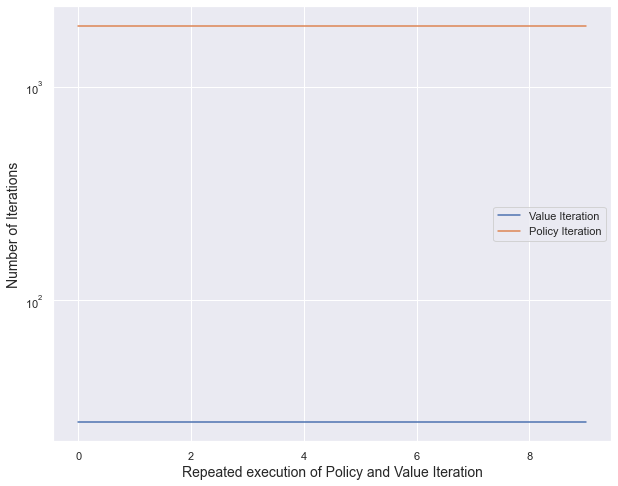

In [145]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1)

planninResultsTable.plot(ax = ax)

ax.set_yscale('log')

ax.set_xlabel('Repeated execution of Policy and Value Iteration', size = 14)

ax.set_ylabel('Number of Iterations', size = 14)

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_policy_vs_val_num_iters_8x8.png"))

### Reserch this a bit further... Why is it that the number of iterations is changing each time?

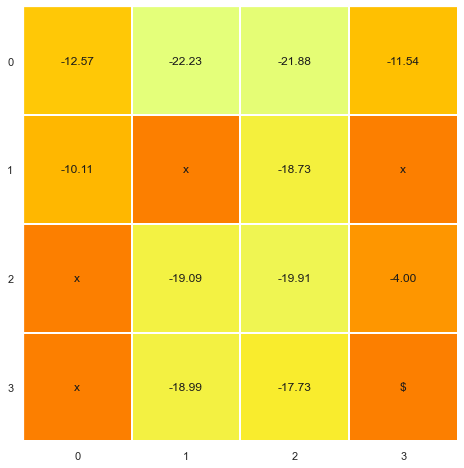

In [141]:
env_frozen_4x4.reset()
maxNumItersForPlot = 1
V_4x4, policy, n_iter, tota_run_time = a4analytics.policyIteration(env_frozen_4x4, theta=0.0001, gamma=1.0, maxNumItersForPlot = maxNumItersForPlot)
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
helpers.visualize_value(V_4x4, FL4x4, shape = [4,4], ax = ax, removeColorBar = True)

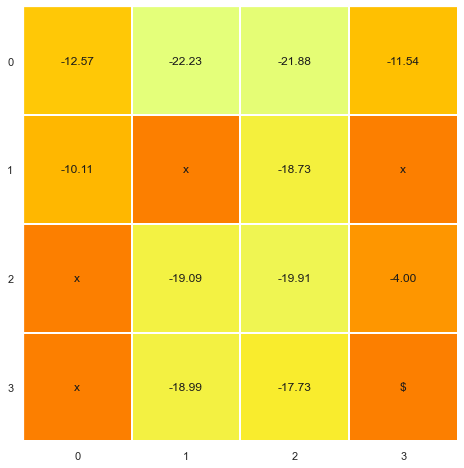

In [142]:
env_frozen_4x4.reset()
maxNumItersForPlot = 1
V_4x4, policy, n_iter, tota_run_time = a4analytics.policyIteration(env_frozen_4x4, theta=0.0001, gamma=1.0, maxNumItersForPlot = maxNumItersForPlot)
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
helpers.visualize_value(V_4x4, FL4x4, shape = [4,4], ax = ax, removeColorBar = True)

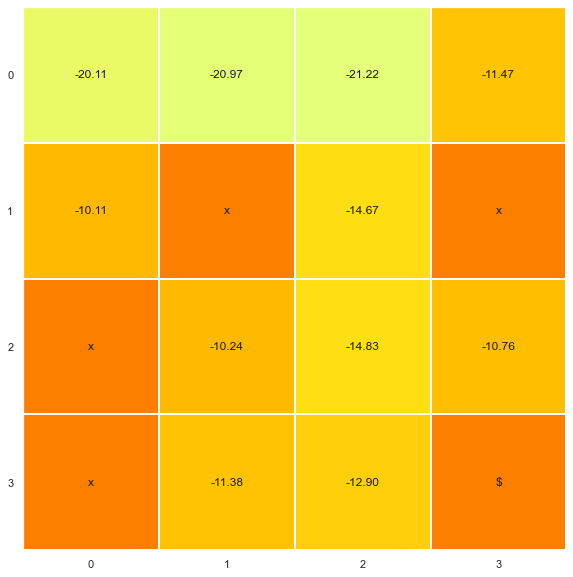

In [299]:
env.N

[autoreload of mlgtsrc.a4analytics failed: Traceback (most recent call last):
  File "C:\Users\User\Anaconda3\envs\datascience\lib\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\User\Anaconda3\envs\datascience\lib\site-packages\IPython\extensions\autoreload.py", line 455, in superreload
    module = reload(module)
  File "C:\Users\User\Anaconda3\envs\datascience\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "E:\PycharmProjects\ML-Spring2022\assigment4\notebooks\../..\mlgtsrc\a4analytics.py", line 1053
    r

AttributeError: 'FrozenLakeEnv' object has no attribute 'N'

### Q-Learning

Analyze all the results from all the other scripts

In [86]:
import pickle
from collections import defaultdict

### Frozen Lake 4x4

Look at the best performing algorithms for both epsilon schedulers

In [294]:
src = r"./frozenlake4x4/results"

In [295]:
analyzer = a4analytics.ResultsAnalyzer(src)

In [296]:
sortedResults = analyzer.summarizeResults()

In [297]:
sortedResults

,Ave Rewards,Rewards Improvement,Exp,Epsilon Scheduler,Run Time,Rewards
2,-7.13,8.53,101,constantScaleRampDownWithMin,33.095000,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
43,-7.30,8.36,29,constantScaleRampDownWithMin,22.875999,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
45,-8.28,7.38,30,constantScaleRampDownWithMin,23.185000,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
18,-8.28,7.38,126,constantScaleRampDownWithMin,37.943999,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
60,-9.16,6.56,66,constantScaleRampDownWithMin,43.027001,"[-14, -13, -11, -17, -14, -13, -21, -14, -16, ..."
...,...,...,...,...,...,...
42,-13.68,1.49,28,constantScaleRampDownWithMin,31.473001,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
53,-16.61,-1.44,50,constantScaleRampDownWithMin,54.932001,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
52,-16.61,-1.44,49,constantScaleRampDownWithMin,55.071999,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
44,-16.61,-1.44,3,constantScaleRampDownWithMin,31.287000,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."


In [98]:
sortedResults

,Ave Rewards,Rewards Improvement,Exp,Epsilon Scheduler,Run Time,Rewards
17,0.04,14.79,25,constantScaleRampDownWithMin,119.027357,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
8,-0.55,14.20,17,constantScaleRampDownWithMin,123.429629,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
53,-0.82,14.49,9,constantScaleRampDownWithMin,74.962256,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
7,-1.36,16.95,16,constantScaleRampDownWithMin,129.866226,"[-14, -13, -11, -17, -13, -13, -12, -20, -12, ..."
13,-1.48,16.19,21,constantScaleRampDownWithMin,124.101503,"[-14, -13, -11, -17, -14, -13, -21, -14, -17, ..."
24,-1.54,16.57,31,constantScaleRampDownWithMin,150.910390,"[-14, -13, -11, -17, -13, -13, -12, -20, -12, ..."
50,-1.74,15.48,6,constantScaleRampDownWithMin,72.759130,"[-14, -13, -11, -17, -14, -13, -21, -14, -17, ..."
5,-1.75,15.35,14,constantScaleRampDownWithMin,128.928725,"[-14, -13, -11, -17, -14, -13, -21, -14, -17, ..."
2,-1.76,13.26,11,constantScaleRampDownWithMin,120.980484,"[-14, -13, -11, -23, -13, -11, 3, -12, -11, -2..."
49,-1.78,6.29,54,hyperbolic,73.056007,"[-14, -27, -11, -17, -19, -15, -16, -13, -36, ..."


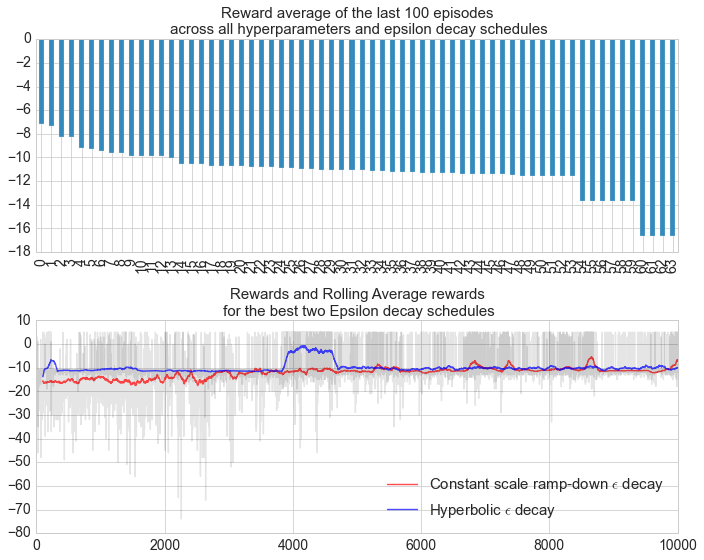

In [298]:
fig, ax = analyzer.plotAllParamsCombinations(sortedResults, layout = 'vertical', figsize = (10,8))
fig.tight_layout()
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_4x4_all_results_decaying_alpha.png"))

### Get the best params

In [274]:
bestConstantScale = analyzer.loadExperiment(25)
bestConstantScale['configParams']

{'nEpisodes': 50000,
 'alpha': 0.05,
 'gamma': 0.95,
 'saveResultIntervals': [1.0],
 'rolling_window': 100,
 'ExperimentName': '25',
 'epsilon_start': 1.0,
 'epsilon_decay': 0.9995,
 'min_epsilon': 0.0,
 'minNumEpisodesBeforeJumpToZero': 100000,
 'epsilon_scheduler': 'constantScaleRampDownWithMin',
 'root': 'E:\\PycharmProjects\\ML-Spring2022\\mlgtsrc\\scripts\\assigment4\\frozenlake4x4\\results',
 'fig_name': 'Frozen_Lake_4x4.png',
 'fig_title': 'Rewards per iteration',
 'print_every': 10000}

In [275]:
bestHyperbolic = analyzer.loadExperiment(54)
bestHyperbolic['configParams']

{'nEpisodes': 50000,
 'alpha': 0.5,
 'gamma': 0.95,
 'saveResultIntervals': [1.0],
 'rolling_window': 100,
 'ExperimentName': '54',
 'epsilon_start': 1.0,
 'epsilon_decay': 0.9,
 'min_epsilon': 0.05,
 'minNumEpisodesBeforeJumpToZero': 100000,
 'epsilon_scheduler': 'hyperbolic',
 'root': 'E:\\PycharmProjects\\ML-Spring2022\\mlgtsrc\\scripts\\assigment4\\frozenlake4x4\\results',
 'fig_name': 'Frozen_Lake_4x4.png',
 'fig_title': 'Rewards per iteration',
 'print_every': 10000}

### Compare Q-Value run times against Policy and Value Iteration

In [238]:
bestHyperbolic.keys()

dict_keys(['rewards_per_episode', 'configParams', 'Qlearner', 'env', 'run time'])

In [245]:
convergenceTime_4x4 = planninResultsTable.loc[planninResultsTable['Problem Size']=='4x4', :].set_index('Method').copy()
convergenceTime_4x4.loc["Q-learning(Hyperbolic)", 'Time to converge (ms)'] = 1e3*bestHyperbolic['run time']
convergenceTime_4x4.loc["Q-learning(Constant scael ramp-down)", 'Time to converge (ms)'] = 1e3*bestConstantScale['run time']

In [246]:
convergenceTime_4x4

,Problem Size,Number of Iterations,Time to converge (ms)
Method,,,
Value Iteration,4x4,17,4.999161
Policy Iteration,4x4,145,39.995432
Q-learning(Hyperbolic),NaN,NaN,73056.007147
Q-learning(Constant scael ramp-down),NaN,NaN,119027.357101


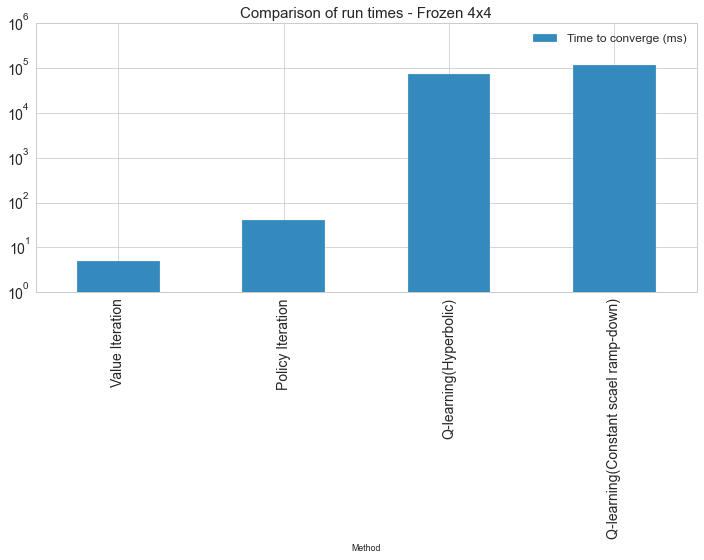

In [247]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
convergenceTime_4x4.loc[:, ['Time to converge (ms)']].plot(ax = ax, kind = 'bar')
ax.set_yscale('log')
ax.set_title('Comparison of run times - Frozen 4x4', size = 15)
fig.tight_layout()
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_4x4_run_times.png"))

### Plot Value function and policy

Run Value Iteration again

Choose same gamma as the ones from hyperbolic and constant ramp down

In [276]:
env_frozen_4x4.reset()
V_val_iter_4x4, policy_val_iter_, n_iter, tota_run_time = a4analytics.policyIteration(env_frozen_4x4, theta=0.0001, gamma=0.95)

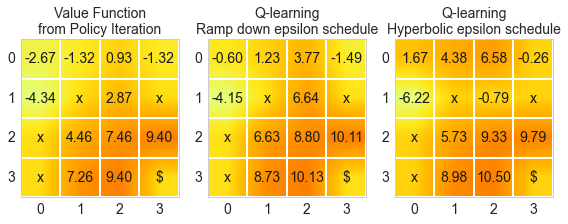

In [277]:
fig = plt.figure(figsize = (8, 8))

# Value function from Value Iteration
ax = fig.add_subplot(1, 3, 1)
title = "Value Function\nfrom Policy Iteration"
helpers.visualize_value(V_val_iter_4x4, FL4x4, shape = [4,4], ax = ax, removeColorBar = True, title = title)

# value function from Q-learning - Constant ramp down
V_q_rampdown = bestConstantScale['Qlearner'].provideValueFunction()
ax = fig.add_subplot(1, 3, 2)
title = "Q-learning\nRamp down epsilon schedule"
helpers.visualize_value(V_q_rampdown, FL4x4, shape = [4,4], ax = ax, removeColorBar = True, title = title)


# value function from Q-learning - Constant ramp down
V_q_hyperbolic = bestHyperbolic['Qlearner'].provideValueFunction()
ax = fig.add_subplot(1, 3, 3)
title = "Q-learning\nHyperbolic epsilon schedule"
helpers.visualize_value(V_q_hyperbolic, FL4x4, shape = [4,4], ax = ax, removeColorBar = True, title = title)

fig.tight_layout()

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_4x4_value_function_comparison.png"))

Compute the average error

In [278]:
np.sum(np.abs(V_q_rampdown - V_val_iter_4x4))/16

1.1245339894684672

In [279]:
np.sum(np.abs(V_q_hyperbolic - V_val_iter_4x4))/16

1.7898559148961288

### Compare policies

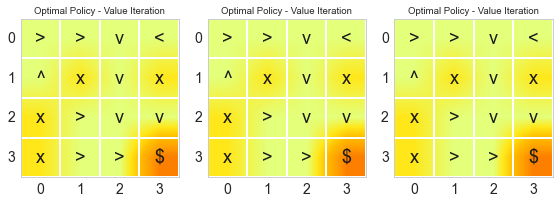

In [188]:
fig = plt.figure(figsize = (8, 8))

# Value function from Value Iteration
ax = fig.add_subplot(1, 3, 1)
title = "Value Function\nfrom Policy Iteration"
helpers.visualize_policy(policy_val_iter_, env_name = FL4x4, shape = [4,4], title='Optimal Policy - Value Iteration', ax = ax)

# value function from Q-learning - Constant ramp down
policy_q = bestConstantScale['Qlearner'].providePolicy()
ax = fig.add_subplot(1, 3, 2)
title = "Q-learning\nRamp down epsilon schedule"
helpers.visualize_policy(policy_q, env_name = FL4x4, shape = [4,4], title='Optimal Policy - Value Iteration', ax = ax)


# value function from Q-learning - Constant ramp down
policy_q = bestHyperbolic['Qlearner'].providePolicy()
ax = fig.add_subplot(1, 3, 3)
title = "Q-learning\nHyperbolic epsilon schedule"
helpers.visualize_policy(policy_q, env_name = FL4x4, shape = [4,4], title='Optimal Policy - Value Iteration', ax = ax)

fig.tight_layout()

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_4x4_policy_comparison.png"))

In [166]:
bestConstantScale.keys()

dict_keys(['rewards_per_episode', 'configParams', 'Qlearner', 'env', 'run time'])

## Frozen Lake 8x8

Look at the best performing algorithms for both epsilon schedulers

In [280]:
src = r"./frozenlake8x8/results"

In [281]:
analyzer = a4analytics.ResultsAnalyzer(src)

In [258]:
sortedResults = analyzer.summarizeResults()

In [226]:
sortedResults

,Ave Rewards,Rewards Improvement,Exp,Epsilon Scheduler,Run Time,Rewards
43,-10.24,40.16,49,hyperbolic,191.252151,"[-34, -34, -43, -108, -31, -23, -18, -33, -28,..."
13,-10.46,24.14,21,constantScaleRampDownWithMin,240.146650,"[-34, -29, -29, -32, -29, -19, -34, -40, -23, ..."
2,-10.62,24.99,11,constantScaleRampDownWithMin,244.365402,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
51,-10.89,39.77,7,constantScaleRampDownWithMin,117.667706,"[-34, -29, -56, -51, -41, -33, -33, -20, -21, ..."
21,-10.97,25.71,29,constantScaleRampDownWithMin,232.146650,"[-34, -29, -29, -32, -29, -19, -34, -40, -23, ..."
8,-11.01,30.56,17,constantScaleRampDownWithMin,240.334149,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
0,-11.05,31.79,1,constantScaleRampDownWithMin,248.569748,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
19,-11.12,26.06,27,constantScaleRampDownWithMin,142.410054,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
53,-11.20,31.64,9,constantScaleRampDownWithMin,122.109332,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
52,-11.28,37.00,8,constantScaleRampDownWithMin,120.939831,"[-34, -29, -56, -51, -41, -33, -33, -20, -21, ..."


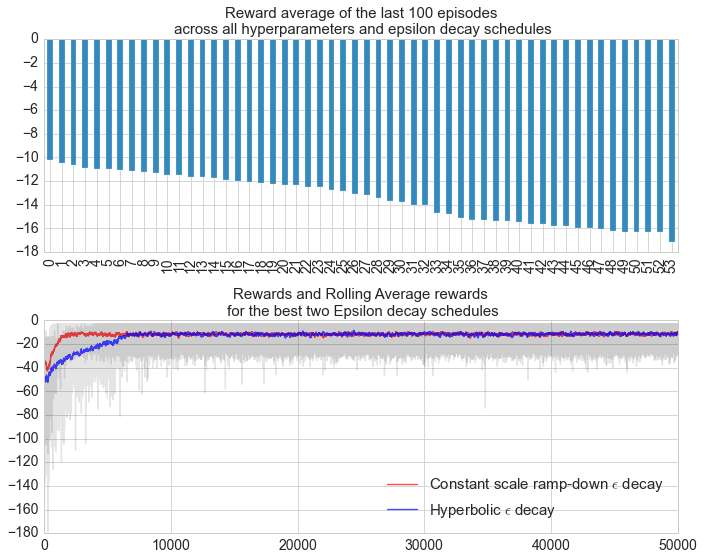

In [195]:
fig, ax = analyzer.plotAllParamsCombinations(sortedResults, layout = 'vertical', figsize = (10,8))
fig.tight_layout()
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_8x8_all_results.png"))

### Get the best params

In [282]:
bestConstantScale = analyzer.loadExperiment(21)
bestConstantScale['configParams']

{'nEpisodes': 50000,
 'alpha': 0.05,
 'gamma': 0.99,
 'saveResultIntervals': [1.0],
 'rolling_window': 100,
 'ExperimentName': '21',
 'epsilon_start': 1.0,
 'epsilon_decay': 0.99,
 'min_epsilon': 0.0,
 'minNumEpisodesBeforeJumpToZero': 100000,
 'epsilon_scheduler': 'constantScaleRampDownWithMin',
 'root': 'E:\\PycharmProjects\\ML-Spring2022\\mlgtsrc\\scripts\\assigment4\\frozenlake8x8\\results',
 'fig_name': 'Frozen_Lake_8x8.png',
 'fig_title': 'Rewards per iteration',
 'print_every': 10000}

In [283]:
bestHyperbolic = analyzer.loadExperiment(49)
bestHyperbolic['configParams']

{'nEpisodes': 50000,
 'alpha': 0.01,
 'gamma': 0.99,
 'saveResultIntervals': [1.0],
 'rolling_window': 100,
 'ExperimentName': '49',
 'epsilon_start': 1.0,
 'epsilon_decay': 0.9,
 'min_epsilon': 0.05,
 'minNumEpisodesBeforeJumpToZero': 100000,
 'epsilon_scheduler': 'hyperbolic',
 'root': 'E:\\PycharmProjects\\ML-Spring2022\\mlgtsrc\\scripts\\assigment4\\frozenlake8x8\\results',
 'fig_name': 'Frozen_Lake_8x8.png',
 'fig_title': 'Rewards per iteration',
 'print_every': 10000}

### Compare Q-Value run times against Policy and Value Iteration

In [261]:
bestHyperbolic.keys()

dict_keys(['rewards_per_episode', 'configParams', 'Qlearner', 'env', 'run time'])

In [262]:
convergenceTime_8x8 = planninResultsTable.loc[planninResultsTable['Problem Size']=='8x8', :].set_index('Method').copy()
convergenceTime_8x8.loc["Q-learning(Hyperbolic)", 'Time to converge (ms)'] = 1e3*bestHyperbolic['run time']
convergenceTime_8x8.loc["Q-learning(Constant scael ramp-down)", 'Time to converge (ms)'] = 1e3*bestConstantScale['run time']

In [263]:
convergenceTime_8x8

,Problem Size,Number of Iterations,Time to converge (ms)
Method,,,
Value Iteration,8x8,27,39.014816
Policy Iteration,8x8,1920,1767.613649
Q-learning(Hyperbolic),NaN,NaN,191252.151012
Q-learning(Constant scael ramp-down),NaN,NaN,240146.650076


### Plot 4x4 and 8x8 together

In [264]:
allConvergenceTimes = pd.DataFrame({'Frozen 4x4': convergenceTime_4x4.loc[:, 'Time to converge (ms)'],
                                    'Frozen 8x8': convergenceTime_8x8.loc[:, 'Time to converge (ms)']
                                   })

In [265]:
allConvergenceTimes

,Frozen 4x4,Frozen 8x8
Method,,
Value Iteration,4.999161,39.014816
Policy Iteration,39.995432,1767.613649
Q-learning(Hyperbolic),73056.007147,191252.151012
Q-learning(Constant scael ramp-down),119027.357101,240146.650076


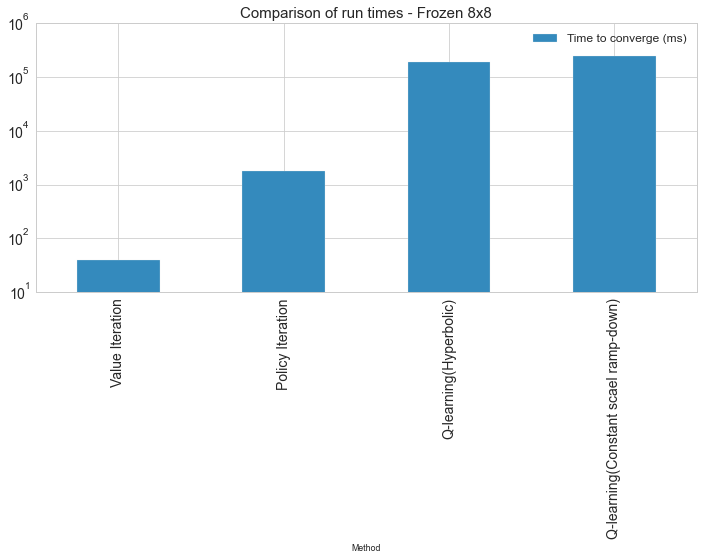

In [232]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
convergenceTime.loc[:, ['Time to converge (ms)']].plot(ax = ax, kind = 'bar')
ax.set_yscale('log')
ax.set_title('Comparison of run times - Frozen 8x8', size = 15)
fig.tight_layout()
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_8x8_run_times.png"))

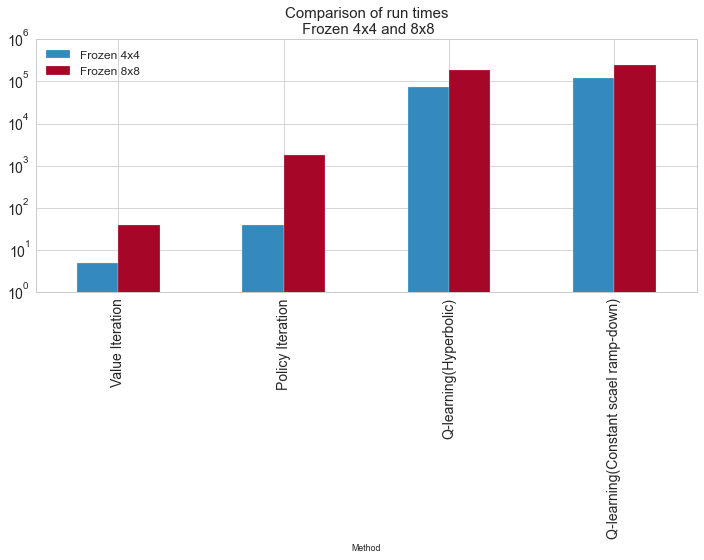

In [266]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
allConvergenceTimes.plot(ax = ax, kind = 'bar')
ax.set_yscale('log')
ax.set_title('Comparison of run times\n Frozen 4x4 and 8x8', size = 15)
fig.tight_layout()
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_4x4_8x8_run_times.png"))

In [267]:
allConvergenceTimes.loc[:, 'Frozen 8x8']/allConvergenceTimes.loc[:, 'Frozen 4x4']

Method
Value Iteration                          7.804273
Policy Iteration                        44.195388
Q-learning(Hyperbolic)                   2.617884
Q-learning(Constant scael ramp-down)     2.017575
dtype: object

In [268]:
64/16

4.0

### Plot Value function and policy

Run Value Iteration again

Choose same gamma as the ones from hyperbolic and constant ramp down

In [288]:
env_frozen_8x8.reset()
V_val_iter_8x8, policy_val_iter_, n_iter, tota_run_time = a4analytics.policyIteration(env_frozen_8x8, theta=0.0001, gamma=0.95)

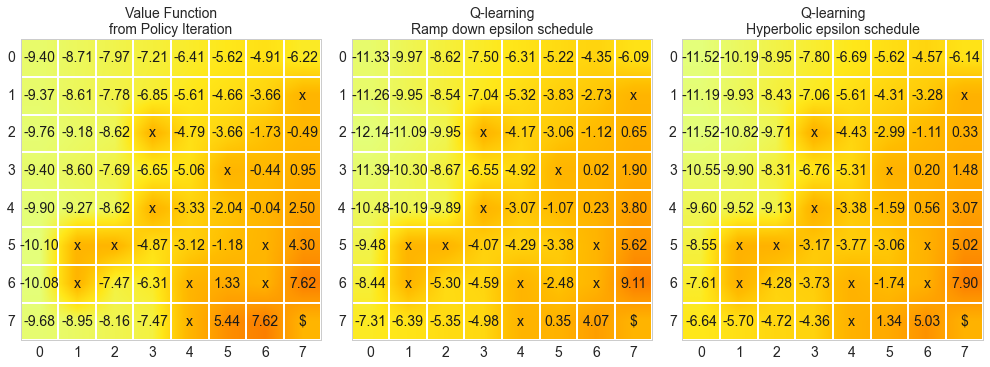

In [289]:
fig = plt.figure(figsize = (14, 14))
shape = [8,8]
# Value function from Value Iteration
ax = fig.add_subplot(1, 3, 1)
title = "Value Function\nfrom Policy Iteration"
helpers.visualize_value(V_val_iter_8x8, FL8x8, shape = shape, ax = ax, removeColorBar = True, title = title)

# value function from Q-learning - Constant ramp down
V_q_rampdown = bestConstantScale['Qlearner'].provideValueFunction()
ax = fig.add_subplot(1, 3, 2)
title = "Q-learning\nRamp down epsilon schedule"
helpers.visualize_value(V_q_rampdown, FL8x8, shape = shape, ax = ax, removeColorBar = True, title = title)


# value function from Q-learning - Constant ramp down
V_q_hyperbolic = bestHyperbolic['Qlearner'].provideValueFunction()
ax = fig.add_subplot(1, 3, 3)
title = "Q-learning\nHyperbolic epsilon schedule"
helpers.visualize_value(V_q_hyperbolic, FL8x8, shape = shape, ax = ax, removeColorBar = True, title = title)

fig.tight_layout()

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_8x8_value_function_comparison.png"))

Compute the average error

In [292]:
np.sum(np.abs(V_q_rampdown - V_val_iter_8x8))/64

1.0601604187141613

In [293]:
np.sum(np.abs(V_q_hyperbolic - V_val_iter_8x8))/64

0.9768681039054846

### Compare policies

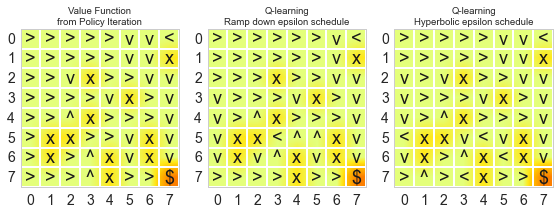

In [216]:
fig = plt.figure(figsize = (8, 8))
shape = [8, 8]
# Value function from Value Iteration
ax = fig.add_subplot(1, 3, 1)
title = "Value Function\nfrom Policy Iteration"
helpers.visualize_policy(policy_val_iter_, env_name = FL8x8, shape = shape, title=title, ax = ax)

# value function from Q-learning - Constant ramp down
policy_q = bestConstantScale['Qlearner'].providePolicy()
ax = fig.add_subplot(1, 3, 2)
title = "Q-learning\nRamp down epsilon schedule"
helpers.visualize_policy(policy_q, env_name = FL8x8, shape = shape, title=title, ax = ax)


# value function from Q-learning - Constant ramp down
policy_q = bestHyperbolic['Qlearner'].providePolicy()
ax = fig.add_subplot(1, 3, 3)
title = "Q-learning\nHyperbolic epsilon schedule"
helpers.visualize_policy(policy_q, env_name = FL8x8, shape = shape, title=title, ax = ax)

fig.tight_layout()

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_8x8_policy_comparison.png"))

In [168]:
V_q = bestConstantScale['Qlearner'].provideValueFunction()

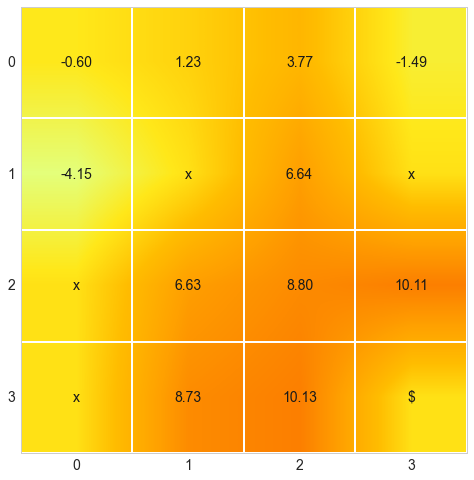

In [171]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
helpers.visualize_value(V_q, FL4x4, shape = [4,4], ax = ax, removeColorBar = True)

In [172]:
policy_q = bestConstantScale['Qlearner'].providePolicy()

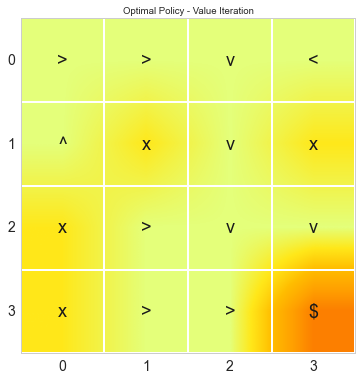

In [173]:
helpers.visualize_policy(policy_q, env_name = FL4x4, shape = [4,4], title='Optimal Policy - Value Iteration')

### Frozen Lake 8x8

Look at the best performing algorithms for both epsilon schedulers

In [158]:
src = r"./frozenlake8x8/results"

In [159]:
analyzer = a4analytics.ResultsAnalyzer(src)

In [160]:
sortedResults = analyzer.summarizeResults()

In [161]:
sortedResults

,Ave Rewards,Rewards Improvement,Exp,Epsilon Scheduler,Run Time,Rewards
43,-10.24,40.16,49,hyperbolic,191.252151,"[-34, -34, -43, -108, -31, -23, -18, -33, -28,..."
13,-10.46,24.14,21,constantScaleRampDownWithMin,240.146650,"[-34, -29, -29, -32, -29, -19, -34, -40, -23, ..."
2,-10.62,24.99,11,constantScaleRampDownWithMin,244.365402,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
51,-10.89,39.77,7,constantScaleRampDownWithMin,117.667706,"[-34, -29, -56, -51, -41, -33, -33, -20, -21, ..."
21,-10.97,25.71,29,constantScaleRampDownWithMin,232.146650,"[-34, -29, -29, -32, -29, -19, -34, -40, -23, ..."
8,-11.01,30.56,17,constantScaleRampDownWithMin,240.334149,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
0,-11.05,31.79,1,constantScaleRampDownWithMin,248.569748,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
19,-11.12,26.06,27,constantScaleRampDownWithMin,142.410054,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
53,-11.20,31.64,9,constantScaleRampDownWithMin,122.109332,"[-34, -33, -52, -30, -24, -45, -14, -37, -20, ..."
52,-11.28,37.00,8,constantScaleRampDownWithMin,120.939831,"[-34, -29, -56, -51, -41, -33, -33, -20, -21, ..."


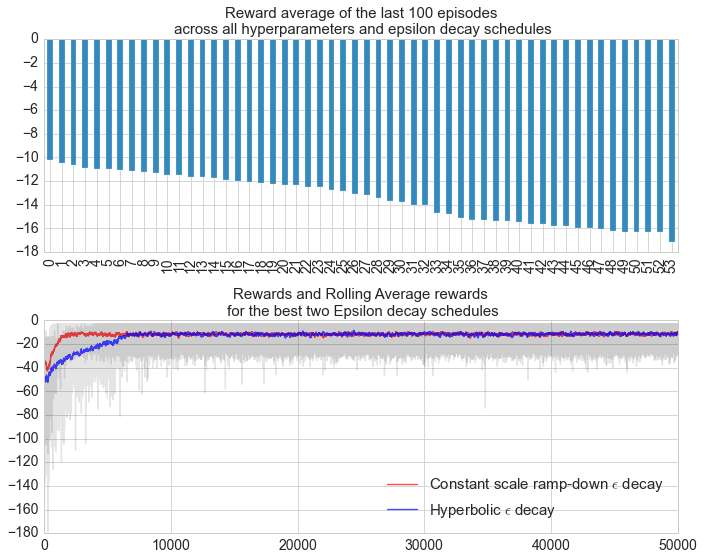

In [165]:
fig, ax = analyzer.plotAllParamsCombinations(sortedResults, layout = 'vertical', figsize = (10,8))
fig.tight_layout()
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_8x8_all_results.png"))

### Get the best params

In [155]:
bestConstantScale = analyzer.loadExperiment(25)
bestConstantScale['configParams']

{'nEpisodes': 50000,
 'alpha': 0.05,
 'gamma': 0.95,
 'saveResultIntervals': [1.0],
 'rolling_window': 100,
 'ExperimentName': '25',
 'epsilon_start': 1.0,
 'epsilon_decay': 0.9995,
 'min_epsilon': 0.0,
 'minNumEpisodesBeforeJumpToZero': 100000,
 'epsilon_scheduler': 'constantScaleRampDownWithMin',
 'root': 'E:\\PycharmProjects\\ML-Spring2022\\mlgtsrc\\scripts\\assigment4\\frozenlake4x4\\results',
 'fig_name': 'Frozen_Lake_4x4.png',
 'fig_title': 'Rewards per iteration',
 'print_every': 10000}

In [157]:
bestHyperbolic = analyzer.loadExperiment(54)
bestHyperbolic['configParams']

{'nEpisodes': 50000,
 'alpha': 0.5,
 'gamma': 0.95,
 'saveResultIntervals': [1.0],
 'rolling_window': 100,
 'ExperimentName': '54',
 'epsilon_start': 1.0,
 'epsilon_decay': 0.9,
 'min_epsilon': 0.05,
 'minNumEpisodesBeforeJumpToZero': 100000,
 'epsilon_scheduler': 'hyperbolic',
 'root': 'E:\\PycharmProjects\\ML-Spring2022\\mlgtsrc\\scripts\\assigment4\\frozenlake4x4\\results',
 'fig_name': 'Frozen_Lake_4x4.png',
 'fig_title': 'Rewards per iteration',
 'print_every': 10000}

### Compare Q-Value run times against Policy and Value Iteration

In [115]:
bestConstantScale = analyzer.loadExperiment(25)

In [117]:
bestHyperbolic = analyzer.loadExperiment(54)

In [118]:
bestHyperbolic.keys()

dict_keys(['rewards_per_episode', 'configParams', 'Qlearner', 'env', 'run time'])

In [144]:
convergenceTime = planninResultsTable.loc[planninResultsTable['Problem Size']=='4x4', :].set_index('Method').copy()
convergenceTime.loc["Q-learning(Hyperbolic)", 'Time to converge (ms)'] = 1e3*bestHyperbolic['run time']
convergenceTime.loc["Q-learning(Constant scael ramp-down)", 'Time to converge (ms)'] = 1e3*bestConstantScale['run time']

In [145]:
convergenceTime

,Problem Size,Number of Iterations,Time to converge (ms)
Method,,,
Value Iteration,4x4,17,4.999161
Policy Iteration,4x4,145,39.995432
Q-learning(Hyperbolic),NaN,NaN,73056.007147
Q-learning(Constant scael ramp-down),NaN,NaN,119027.357101


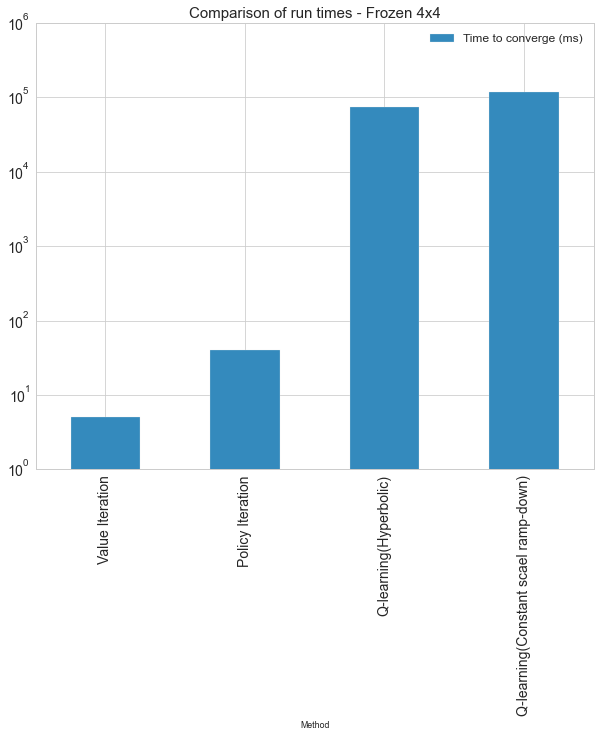

In [154]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
convergenceTime.loc[:, ['Time to converge (ms)']].plot(ax = ax, kind = 'bar')
ax.set_yscale('log')
ax.set_title('Comparison of run times - Frozen 4x4', size = 15)
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "frozen_lake_4x4_run_times.png"))